In [1]:
import numpy as np

In [19]:
def sin_signal(x):
    return np.sin(x * np.pi)
def saw_tooth(x):
    return x % 1
def pulse(x):
    return np.floor(x%2)

In [20]:
import matplotlib.pyplot as plt

In [21]:
t = np.linspace(0, 10, 1000)

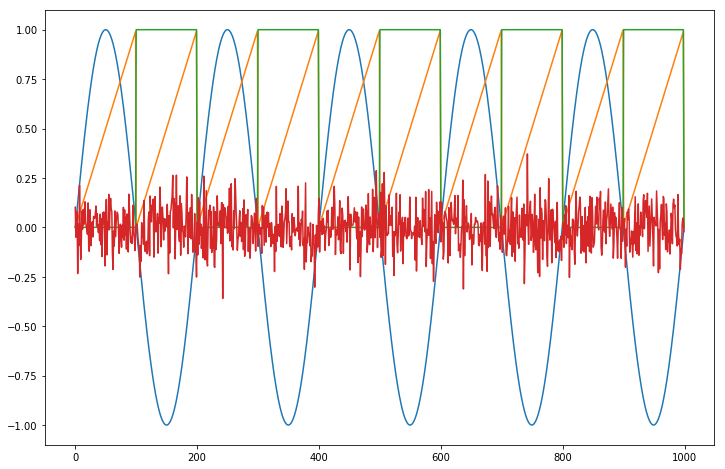

In [217]:
sin_samples = sin_signal(t)
saw_tooth_samples = saw_tooth(t)
pulse_samples = pulse(t)
noise_samples = np.random.normal(size=1000)
plt.figure(figsize=(12,8))
plt.plot(sin_samples)
plt.plot(saw_tooth_samples)
plt.plot(pulse_samples)
plt.plot(0.1*noise_samples)

In [139]:
S = np.array([sin_samples, saw_tooth_samples, pulse_samples, noise_samples]).T
A = np.array([
    [1, 1, 1, 0.1],
    [1, .5, .5, 0.02],
    [0.5, 1, 2, 0.05],
    [0.4, 2, .5, 0.1]])

In [150]:
X = (S @ A.T).T

In [214]:
def center(X):
    means = X.mean(axis=1, keepdims=True)
    centered = X - means
    return centered, means

def whiten(X):
    cov = X.dot(X.T) / (X.shape[1] - 1)
    U, S, V = np.linalg.svd(cov)
    D = np.diag(1 / (S)**.5)
    whiteM = np.dot(U, np.dot(D, U.T))
    Xw = np.dot(whiteM, X)
    return Xw, whiteM

def fastICA(X,  thresh=1e-8, iterations=5000):
    m, n = X.shape
    W = np.random.rand(m, m)
    for c in range(m):
            w = W[c, :].copy().reshape(m, 1)
            w = w / np.sqrt((w ** 2).sum())

            lim = 100
            for i in range(iterations):
                if (lim < thresh):
                    break
                wx = np.dot(w.T, X)
                g = np.tanh(wx).T
                g_prime = (1 - np.square(np.tanh(wx)))
                wNew = (X * g.T).mean(axis=1) - g_prime.mean() * w.squeeze()
                wNew = wNew - np.dot(np.dot(wNew, W[:c].T), W[:c])
                wNew = wNew / np.sqrt((wNew ** 2).sum())
                lim = np.abs(np.abs((wNew * w).sum()) - 1)
                w = wNew

            W[c, :] = w.T
    return W
def unmix(Xw, W, means):
    unMixed = Xw.T.dot(W.T)
    unMixed = (unMixed.T - means)
    return unMixed

centered, means = center(X)
Xw, whiteM = whiten(centered)
W = fastICA(Xw)
unMixed = unmix(Xw, W, means)


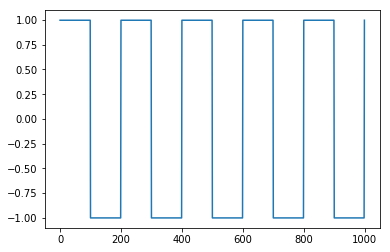

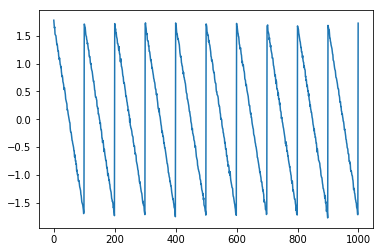

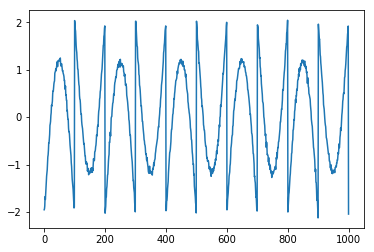

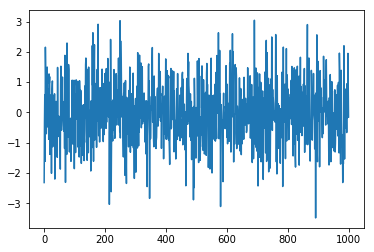

In [216]:
for x in unMixed:
    plt.plot(x)
    plt.show()